In [156]:
import joblib
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [157]:
data = pd.read_csv('data-models/train.csv')
data.columns
data.shape
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


/home/mb/CODES/loan-prediction/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

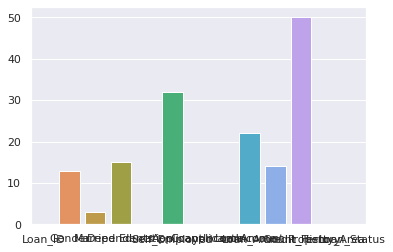

In [158]:
x = data.columns
y = data.isnull().sum()
sns.set()
sns.barplot(x, y)


In [159]:
data.Loan_Status = data.Loan_Status.map({"Y":1, "N":0})
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [160]:
data.Gender = data.Gender.map({"Male" : 0 , "Female":1})

In [161]:
data.Education = data.Education.map({"Not Graduate":0, "Graduate":1})

In [162]:
data.Self_Employed = data.Self_Employed.map({"No":0, "Yes":1})

In [163]:
data.Property_Area = data.Property_Area.map({"Urban":0, "Rural":1, "Semiurban":2})

In [164]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,No,0,1,0.0,5849,0.0,NaN,360.0,1.0,0,1
1,LP001003,0.0,Yes,1,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,0.0,Yes,0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0.0,Yes,0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0.0,No,0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1


In [165]:
data.Married = data.Married.map({"No":0, "Yes":1})
data.Dependents = data.Dependents.map({"0":0, "1":1, "2":2, "3+":3})

In [166]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,0,1
1,LP001003,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1


In [167]:
data.isnull().sum() #How many rows are null from each column
values = {"Gender":0, "Married":0.0, "Dependents":0, "Education":0, "Self_Employed":0.0,"ApplicantIncome":2000, 
"CoapplicantIncome":0.0, "LoanAmount":128.0, "Loan_Amount_Term":360.0, "Credit_History":1.0, "Property_Area":0, "Loan_Status":1}
data.fillna(value=values)
data.dropna(subset=["Gender", "Married", "Dependents", "Education","Self_Employed","ApplicantIncome", "CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area" , "Loan_Status"], inplace=True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,0.0,1.0,2.0,1,1.0,5417,4196.0,267.0,360.0,1.0,0,1


In [168]:
X = data.drop('Loan_Status', axis=1)
X = X.drop('Loan_ID', axis=1)
y = data.Loan_Status

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [170]:
adaMod = AdaBoostClassifier(base_estimator=None, learning_rate=1.0)

In [171]:
adaMod.fit(X_train, y_train)

AdaBoostClassifier()

In [172]:
adaMod.score(X_test, y_test)

0.8

In [173]:
test_labels=adaMod.predict_proba(np.array(X_test.values))[:,1]

/home/mb/CODES/loan-prediction/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [174]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.6828125

In [175]:
joblib_model = "LoanPredictionAdaBoost.joblib"
joblib.dump(adaMod,joblib_model)

['LoanPredictionAdaBoost.joblib']